# Tunelamento

O isolamento social durante a pandemia faz com que nós as vezes tenhamos vontade de bater a cabeça na parede. Hoje eu vou explicar como, caso você fosse tão pequeno quanto um elétron, e tentasse bater a cabeça correndo muito rápido em direção a parede, provavelmente você só ia parar no quarto ao lado e sair quase ileso: vamos falar hoje sobre tunelamento.

Um dos primeiros problemas que todo aluno que aprende alguma coisa sobre mecânica quântica na vida resolve é o de um elétron que colide com uma parede. Por incrível que pareça, é um problema que tem várias aplicações em meso- e nanoeletrônica. E como ninguém aqui tá lendo esse texto pra aprender a resolver a equação de Schrödinger, eu vou falar um pouco de como esse tipo de fenômeno aparece em problemas reais.

## Na nanoeletrônica

Vamos voltar ao problema que já visitamos por aqui: elétrons que se propagam em um nanofio. Vamos supor que você queira controlar o fluxo de elétrons que pode passar num determinado intervalo de tempo para uma dada voltagem. Ou seja, você quer controlar a condutância de um nanofio. Uma maneira fácil de fazer isso é acrescentando um **tunnel gate**, $V_t$, no nanofio (em tradução livre, um *portão de tunelamento*). Funciona mais ou menos como o esquema da figura abaixo: colocamos, em cima de uma pequena região do nanofio, um contato elétrico. Mudando a voltagem nesse contato elétrico, nós vamos criar uma barreira eletrostática por onde elétrons não podem passar.

![](nanowire.jpeg)

Não fosse o comportamento quântico dos elétrons, esse seria um problema fácil de resolver fazendo uma analogia com uma montanha russa ilustrada abaixo: elétrons rápidos o suficiente poderiam passar pela barreira, enquanto elétrons devagar demais não passariam. Em termos um pouco mais técnicos, se a energia cinética $mv^2/2$ dos elétrons for maior que a energia potencial $mgh$, eles atravessam a barreira. Caso contrário, eles não conseguem atravessar.

![](potential.jpeg)

Acontece que com elétrons a situação é diferente: mesmo que eles não possuam energia cinética suficiente pra atravessar a barreira, alguns deles ainda atravessam. E obviamente nós temos que levar isso em conta quando estamos lidando com nanodispositivos. Vamos ver o que acontece com uma simulação: criamos um nanofio com uma barreira eletrostatica, conforme a fgura abaixo.

In [1]:
import wire
import kwant
import numpy as np
from adaptive import notebook_extension, Runner, Learner1D, Learner2D, SequenceLearner
notebook_extension()
from functools import partial
import matplotlib.pyplot as plt

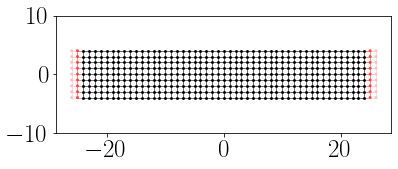

In [2]:
sys = wire.create_sys(L=50)
kwant.plot(sys, show=False, site_color='k')
plt.ylim(-10, 10)
plt.show()

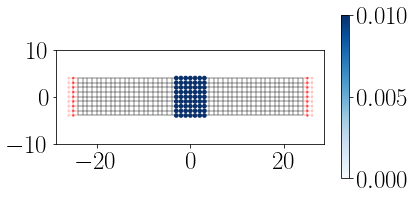

In [3]:
params=dict(U = 0.01, l = 4)
# The potential can be seen clearer when we use a different plotting function.
kwant.plot(
    sys,
    site_color=lambda i: sys.hamiltonian(i, i, params=params) - 4,
    site_size=lambda i: 50 * (sys.hamiltonian(i, i, params=params) - 4),
    cmap='Blues',
    show=False,
    colorbar=True
)
plt.ylim(-10, 10)
plt.show()

Conforme aumentamos o potencial eletrostático, a condutância diminui exponencialmente. Mas repare que mesmo com $U > E$, ou $U - E > 0$, a condutância ainda é finita. Isso significa que existe uma probabilidade de os elétrons atravessarem essa barreira eletrostática.

In [4]:
learner = Learner1D(
    partial(wire.compute_conductance, sys = sys, l = 2),
    bounds=(0.2, 0.7)
)
runner = Runner(learner, goal=lambda l: l.npoints > 100)
runner.live_info()

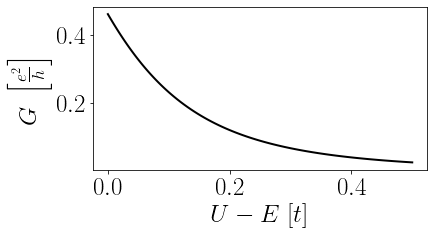

In [6]:
data = learner.data
Us, Gs = map(list, zip(*sorted(data.items())))
wire.plot_cond(np.asarray(Us) - 0.2, Gs, x_label = r'$U - E\ [t]$')

Se fixarmos o tamanho da barreira eletrostática e mudarmos a largura dela, também observamos um comportamento parecido. Note que a condutância diminui a cada vez que aumentamos um átomo na largura da barreira.

In [7]:
def length(l):
    return wire.compute_conductance(sys = sys, U = .2, l = l)

Ls=np.linspace(1,8, num=8, endpoint=True)

learner = SequenceLearner(
    length,
    Ls
)
runner = Runner(learner, SequenceLearner.done)
runner.live_info()

In [8]:
runner.task.result()

(-0.1, 1.1)

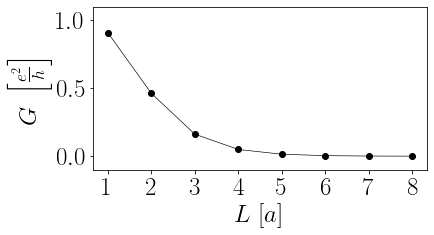

In [9]:
data = learner.data
ls, Gs_0 = map(list, zip(*sorted(data.items())))
plt.scatter(np.asarray(Ls), Gs_0, c='k')
plt.plot(np.asarray(Ls), Gs_0, c='k')
plt.xlabel(r'$L\ [a]$')
plt.ylabel(r'$G\ \left[\frac{e^2}{h}\right]$')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8])
plt.ylim(-0.1, 1.1)

Ou seja: descobrimos que elétrons podem atravessar paredes! Se essas paredes não forem muito fortes e nem muito largas, os elétrons tem uma probabilidade bastante alta de conseguir fazer a travessia.

## Microscópios

De fato, por mais simples que pareça esse fenômeno, existe uma aplicação muito importante: o microscópio eletrônico de tunelamento.

Todo material possui elétrons em sua constituição. Os elétrons normalmente se localizam próximos aos núcleos dos átomos. Logo, se fossemos capazes de mapear onde os elétrons se localizam, saberíamos onde estão os núcleos atômicos. É isso que o microscópio faz: passa uma agulha **muito** fina (com uma ponta que tem apenas um átomo de diâmetro) por cima da superfície de um material. Se injetarmos elétrons nessa agulha da mesma forma que injetamos elétrons no nanofio que acabamos de simular, esses elétrons sentirão uma barreira elétrostática. Essa barreira é exatamente o espaço vazio que separa a agulha do material. Então, medimos quantos dos elétrons que injetamos conseguem tunelar por essa barreira e entrar na superfície do material. Como a superfície não é uniforme, já que em alguns pontos a agulha passa por cima de um átomo e em outros ela passa pelo espaço vazio que separa os átomos, é possível mapear a superfície e gerar uma imagem da estrutura cristalina do material.

In [12]:
from IPython.display import HTML

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/HE2yE8SvHmA" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

/home/antonio/anaconda3/envs/kwant-env/lib/python3.8/site-packages/IPython/core/display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## Diodo túnel

Tudo bem, microscópios de tunelamento são equipamentos que só são vistos em laboratórios. Então vamos para uma outra aplicação do tunelamento que pode ser encontrada em vários dispositivos eletrônicos: o diodo túnel de ressonânica.

Nesse dispositivo, em vez de uma, colocamos duas barreira eletrostáticas. Ao colocar duas barreiras, criamos o que chamamos de *poço quântico*, que nada mais é que uma região em que os elétrons ficam presos. Acontece que elétrons presos não podem ter qualquer energia, apenas energias quantizadas. Para quem tem alguma familiaridade com música, as energias permitidas tem uma analogia com as frequências dos harmônicos de uma corda de violão.

In [30]:
sys = wire.create_sys(barrier = 'double', L = 50)

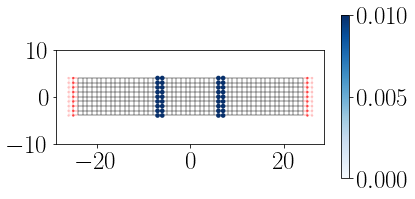

In [31]:
params=dict(U = 0.01, l = 1)
# The potential can be seen clearer when we use a different plotting function.
kwant.plotter.plot(
    sys,
    site_color=lambda i: sys.hamiltonian(i, i, params=params) - 4,
    site_size=lambda i: 50 * (sys.hamiltonian(i, i, params=params) - 4),
    cmap='Blues',
    show=False,
    colorbar=True
)
plt.ylim(-10, 10)
plt.show()

Sendo assim, ao injetar um elétron com uma energia qualquer no nanofio, existem duas opções:
* A energia não é compatível com uma dessas energias quantizadas do poço quântico, e a única forma do elétron chegar do outro lado do nanofio é tunelando através do poço quântico todo. A probabilidade de tunelamento nesse caso é baixa, e vai aumentando exponencialmente conforme aumenta a energia do elétron injetado.
* A energia do elétron é **exatamente** a mesma energia do estado eletrônico dentro do poço quântico. Nesse caso, é como se o elétron injetado encontrasse um "buraco" nessa parede eletrostática e pudesse atravessar sem precisar dar sorte de ser tunelado. Nesse caso, dizemos que o elétron injetado está em ressonância com o estado eletrônico do poço quântico e é como se não existisse barreira nenhuma. Se só um elétron pode atravessar o posso quântico de cada vez, a condutânica, segundo a fórmula de Landauer, é exatamente $G=e^2/h$.

In [15]:
def bias(V):
    return wire.compute_conductance(sys = sys, U = .25, l = 1, energy = V)

learner = Learner1D(
    bias,
    bounds=(0.1, .25)
)
runner = Runner(learner, goal=lambda l: l.npoints > 200)
runner.live_info()

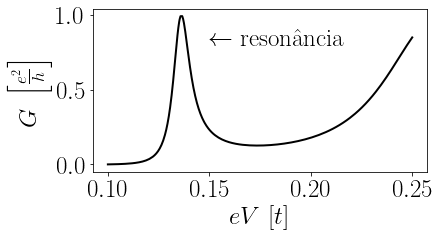

In [29]:
data = learner.data
Vs, Gs = map(list, zip(*sorted(data.items())))
wire.plot_cond(np.asarray(Vs), np.asarray(Gs), show=False)
plt.text(.15, 0.8, r'$\leftarrow \mathrm{reson\hat{a}ncia}$')
plt.show()

Esse pico de ressonância pode ser usado como uma chave lógica: ao entrar em ressonância o dispositivo liga, ao sair da ressonância, desliga.

(Note que a energia dos elétrons injetados não pode ser muito maior que a energia de ressonância, se não a probabilidade de tunelameto aumenta cada vez mais e a condutância de tunelamento se torna tão grande quanto a condutância de ressonância.)